In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandasql as ps
%matplotlib inline

In [3]:
%%time
medal_count= pd.read_excel('Medals.xlsx')
medal_count

Wall time: 19 ms


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


# Estimates of location 

In [6]:
# Mean
medal_count['Total'].mean()

11.612903225806452

In [8]:
# Weighted Mean
np.average(medal_count['Total'], weights=medal_count['Gold'])

46.832352941176474

In [9]:
from scipy.stats import trim_mean

In [10]:
# Trimmed Mean: Helps reduces the impact of outliers.

trim_mean(medal_count['Gold'], 0.1)

1.96

In [18]:
%pprint #(turn off/on pretty printing)
list(medal_count['Gold'])

Pretty printing has been turned OFF


[39, 38, 27, 22, 20, 17, 10, 10, 10, 10, 7, 7, 7, 7, 6, 6, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
# Median

medal_count['Total'].median()


4.0

In [23]:
# Weighted Median
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, 'Total', 'Gold')

40

In [29]:
q3 = np.percentile(medal_count['Total'],75)
q3

11.0

In [30]:
 medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


# Estimates of Variability (Dispersion Metrics)

In [31]:
from statistics import variance

In [32]:
# Deviation 
variance(medal_count['Gold'])

49.315100514259

In [33]:
# Standard Deviation
from statistics import stdev

In [34]:
stdev(medal_count['Gold'])

7.022471111671376

In [35]:
# Mean Absolute Deviation
from numpy import mean, absolute

In [39]:
mean(absolute(medal_count['Gold'] - mean(medal_count['Gold'])))

4.0048560527228565

In [42]:
# Median Absolute Deviation
from numpy import median, absolute
median(absolute(medal_count['Gold'] -median(medal_count['Gold'])))

1.0

# Exploring the Data Distribution

In [44]:
# Percentiles and Boxplots

<AxesSubplot:>

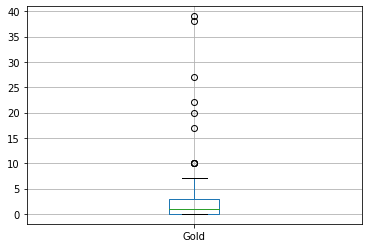

In [64]:
# Box Plots

medal_count.boxplot(column='Gold')

In [67]:
# Frequency Table
frequency_table = medal_count.copy()
frequency_table['freq'] = pd.cut(medal_count['Gold'], 10)
frequency_table

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,freq
0,1,United States of America,39,41,33,113,1,"(35.1, 39.0]"
1,2,People's Republic of China,38,32,18,88,2,"(35.1, 39.0]"
2,3,Japan,27,14,17,58,5,"(23.4, 27.3]"
3,4,Great Britain,22,21,22,65,4,"(19.5, 23.4]"
4,5,ROC,20,28,23,71,3,"(19.5, 23.4]"
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,"(-0.039, 3.9]"
89,86,Grenada,0,0,1,1,77,"(-0.039, 3.9]"
90,86,Kuwait,0,0,1,1,77,"(-0.039, 3.9]"
91,86,Republic of Moldova,0,0,1,1,77,"(-0.039, 3.9]"


In [68]:
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  2.]), array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
       14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
       28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]), <BarContainer object of 30 artists>)

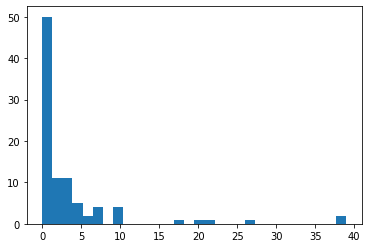

In [74]:
plt.hist(x=medal_count['Gold'], bins='auto')

<AxesSubplot:ylabel='Density'>

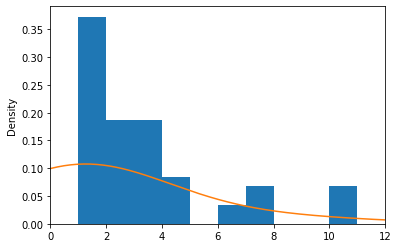

In [79]:
# Density Plot

ax = medal_count['Gold'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal_count['Gold'].plot.density(ax=ax)

# Exploring Binary and Categorical Data

In [80]:
medal_count['Gold'].mode()

0    0
dtype: int64

Text(0, 0.5, 'Country')

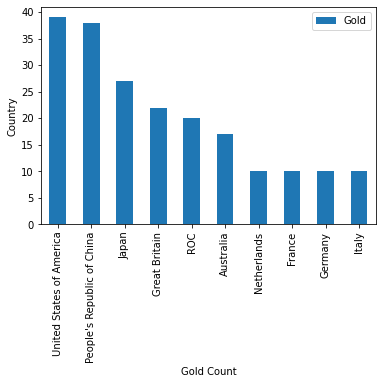

In [84]:
ax = medal_count.iloc[:10].plot.bar (x='Team/NOC', y='Gold')
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

([<matplotlib.patches.Wedge object at 0x00000284855FFC10>, <matplotlib.patches.Wedge object at 0x000002848560E550>, <matplotlib.patches.Wedge object at 0x000002848560ED60>, <matplotlib.patches.Wedge object at 0x000002848561B5B0>, <matplotlib.patches.Wedge object at 0x000002848561BDC0>, <matplotlib.patches.Wedge object at 0x000002848562A610>, <matplotlib.patches.Wedge object at 0x000002848562AE20>, <matplotlib.patches.Wedge object at 0x0000028485639670>, <matplotlib.patches.Wedge object at 0x0000028485639E80>, <matplotlib.patches.Wedge object at 0x00000284856486D0>], [Text(-0.6243322674600585, 0.9056540287594277, 'United States of America'), Text(-1.0724207066739067, -0.2447730130080495, "People's Republic of China"), Text(-0.3673213244876795, -1.0368582567432336, 'Japan'), Text(0.4463732217985583, -1.0053611027194036, 'Great Britain'), Text(0.9637732416311904, -0.530227440553304, 'ROC'), Text(1.0973336402954277, 0.0765433333216221, 'Australia'), Text(0.9718633010825214, 0.5152491863253

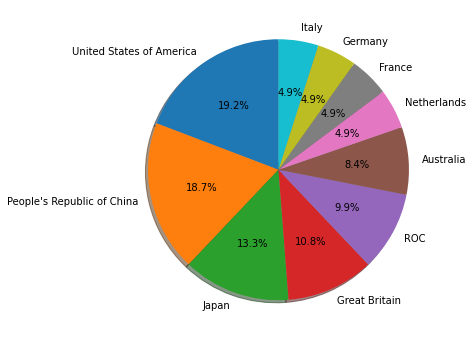

In [92]:
pie_data = medal_count[:10]
plt.figure(figsize=(8,6))
plt.pie(pie_data['Gold'], labels=pie_data['Team/NOC'], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Correlation

                   Rank      Gold    Silver    Bronze     Total  Rank by Total
Rank           1.000000 -0.655477 -0.597835 -0.637166 -0.655877       0.873539
Gold          -0.655477  1.000000  0.929046  0.862425  0.970840      -0.626012
Silver        -0.597835  0.929046  1.000000  0.862646  0.969439      -0.632831
Bronze        -0.637166  0.862425  0.862646  1.000000  0.941941      -0.745573
Total         -0.655877  0.970840  0.969439  0.941941  1.000000      -0.692450
Rank by Total  0.873539 -0.626012 -0.632831 -0.745573 -0.692450       1.000000


<AxesSubplot:>

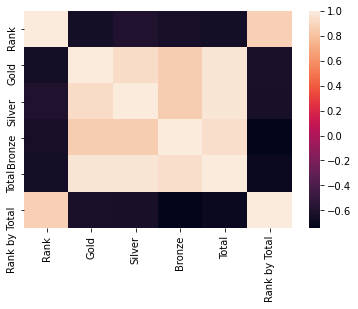

In [101]:
print(medal_count.corr())
sns.heatmap(medal_count.corr())

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

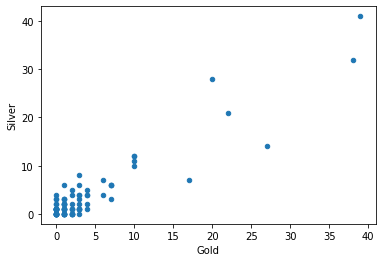

In [98]:
medal_count.plot.scatter( x='Gold', y='Silver')

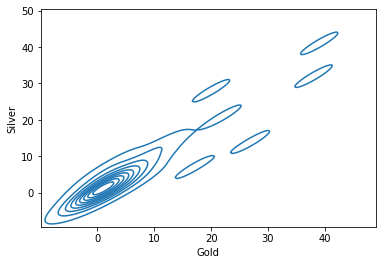

In [106]:
ax =sns.kdeplot(data=medal_count, x=medal_count['Gold'], y=medal_count['Silver'])

In [118]:
# Contingency Table

crosstab = medal_count[['Silver','Gold']].pivot_table(index='Silver', columns = 'Gold', aggfunc = lambda x:len(x), margins = True)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [113]:
pd.pivot_table(data=medal_count, values=None, index='Team/NOC', columns='Gold', aggfunc=lambda x:len(x), fill_value=None, margins=True).fillna(0)

Bronze                                             \
Gold                          0     1     2     3    4    6    7   10   17   
Team/NOC                                                                     
Argentina                   1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Armenia                     1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Australia                   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  1.0   
Austria                     0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Azerbaijan                  1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
...                         ...   ...   ...   ...  ...  ...  ...  ...  ...   
Ukraine                     0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
United States of America    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Uzbekistan                  0.0   0.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0   
Venezuela                   0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
All                        28.0  22.0  11.0  11.0  5.0  2.0  4.0  4.0  1.0   

                               ... Total                                     \
Gold                       20  ...     6    7   10   17   20   22   27   38   
Team/NOC                       ...                                            
Argentina                 0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Armenia                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Australia                 0.0  ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
Austria                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Azerbaijan                0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                       ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
Ukraine                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
United States of America  0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Uzbekistan                0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Venezuela                 0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
All                       1.0  ...   2.0  4.0  4.0  1.0  1.0  1.0  1.0  1.0   

                                   
Gold                       39 All  
Team/NOC                           
Argentina                 0.0   1  
Armenia                   0.0   1  
Australia                 0.0   1  
Austria                   0.0   1  
Azerbaijan                0.0   1  
...                       ...  ..  
Ukraine                   0.0   1  
United States of America  1.0   1  
Uzbekistan                0.0   1  
Venezuela                 0.0   1  
All                       1.0  93  

[94 rows x 75 columns]